In [1]:
import torch
from torch import optim, nn
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision
from torchvision import transforms as T
from torchvision import models, datasets
import torch.nn.functional as F
import random
import warnings
from torch.autograd import Variable
warnings.filterwarnings("ignore")

import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import  metrics
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
from time import sleep

from utils import imshow, show_batch, show_image, show_image_pair, get_accuracy_bin
from models import ContrastiveLoss, EfficientSiemens, SiameseNetworkSimple, EfficientSiemensBinary, EfficientClassification, EfficientSiemens2, ResNet34, Efficientb4Siemens
from generate_dataset import SiameseDataset, ClassificationDataset, TestingDatasetImageNet
from train import trainSiamens, trainBinary, trainClass, test
from generate_ds_full_size import generate_training, generate_test

/Users/kristinanikolic/opt/anaconda3/envs/CV/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define main data directory
DATA_DIR = 'tiny-imagenet-200-test' # Original images come in shapes of [3,64,64]

# Define training and validation data paths
TRAIN_DIR = os.path.join(DATA_DIR, 'train') 
VALID_DIR = os.path.join(DATA_DIR, 'val')

In [4]:
# Define device to use (CPU or GPU). CUDA = GPU support for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Using: " + str(device))

Using: cpu


In [5]:
train_dataloader = generate_training(batch_size=128, use_cuda=use_cuda, num_class=2,NxN=False)
val_dataloader = generate_training(batch_size=128, use_cuda=use_cuda, num_class=2,NxN=False,val=True)

test_dataloader = generate_test(batch_size=128, use_cuda=use_cuda, num_class=2,NxN=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


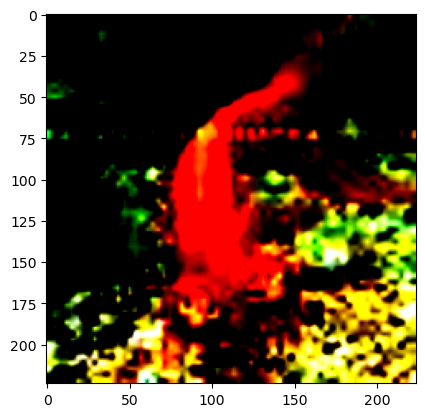

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


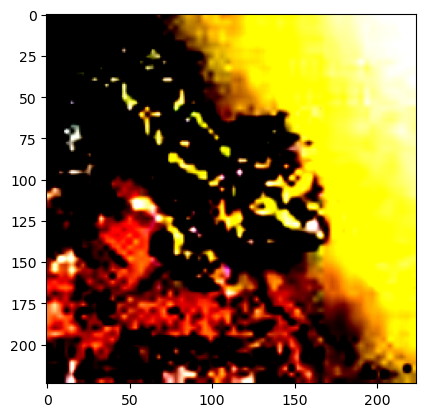

Label: tensor([0.]), Shape: torch.Size([3, 224, 224])


In [6]:
show_image_pair(val_dataloader)

In [ ]:
from generate_dataset import generate_ds, generate_ds_class

generate_ds("train_20_10000.csv",20,ds_size=10000)
train_data = SiameseDataset('train_20_10000.csv',TRAIN_DIR,preprocess_transform_pretrain)
batch_size = 128

if use_cuda:
    kwargs = {"pin_memory": True, "num_workers": 1}
else:
    kwargs = {}

# Wrap image dataset (defined above) in dataloader 
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)

generate_ds("val_20_2000.csv",20,ds_size=2000,val=True)
val_data = SiameseDataset('val_20_2000.csv',TRAIN_DIR,preprocess_transform_pretrain)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False, **kwargs)

# generate_ds("test_20_2000.csv",20,ds_size=2000)
# test_data = SiameseDataset('test_20_2000.csv',VALID_DIR,preprocess_transform_pretrain, val=True)
# test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)


In [7]:
# Declare Siamese Network
net = EfficientSiemens2(20)
net = net.to(device)
# Decalre Loss Function
criterion = ContrastiveLoss()
criterionB = nn.BCEWithLogitsLoss()
criterionC = nn.CrossEntropyLoss()
# Declare Optimizer
optimizer = optim.Adam(net.parameters(), lr=0.0005, weight_decay=False)
sch = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
# Epochs
epochs = 2
tresholds = [0.75, 1.0, 1.25, 1.5]

INIT
163968


100%|██████████| 7/7 [00:51<00:00,  7.36s/it]


Epoch 0
 Current loss 0.29481029510498047
Current accuracy 0.61375 for 0.75

Current accuracy 0.68125 for 1.0

Current accuracy 0.6525 for 1.25

Current accuracy 0.6175 for 1.5

F1 score 0.7279843444227005 for 1


100%|██████████| 2/2 [00:13<00:00,  6.93s/it]


Epoch 0
 Current val loss 0.24419553577899933
Current val accuracy 0.6683333333333333 for 0.75

Current val accuracy 0.8216666666666667 for 1.0

Current val accuracy 0.9016666666666666 for 1.25

Current val accuracy 0.89 for 1.5



100%|██████████| 7/7 [00:59<00:00,  8.56s/it]


Epoch 1
 Current loss 0.2722613215446472
Current accuracy 0.62875 for 0.75

Current accuracy 0.78125 for 1.0

Current accuracy 0.8575 for 1.25

Current accuracy 0.8775 for 1.5

F1 score 0.8347826086956522 for 1


100%|██████████| 2/2 [00:10<00:00,  5.48s/it]

Epoch 1
 Current val loss 0.18143707513809204
Current val accuracy 0.7316666666666667 for 0.75

Current val accuracy 0.8566666666666667 for 1.0

Current val accuracy 0.91 for 1.25

Current val accuracy 0.9216666666666666 for 1.5



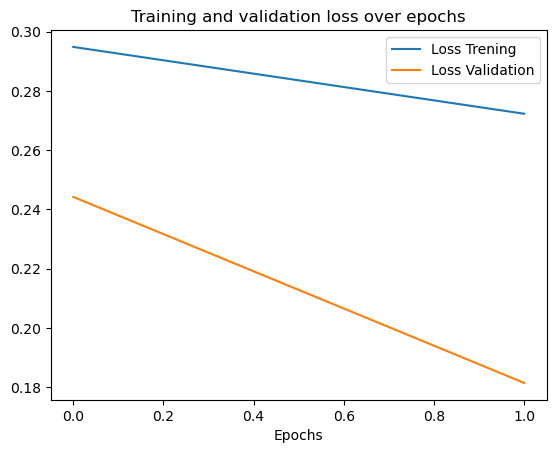

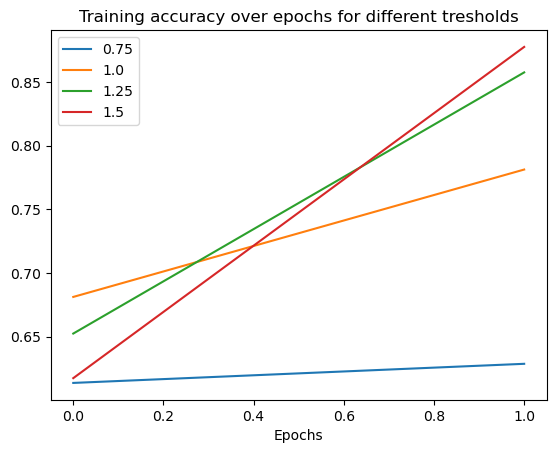

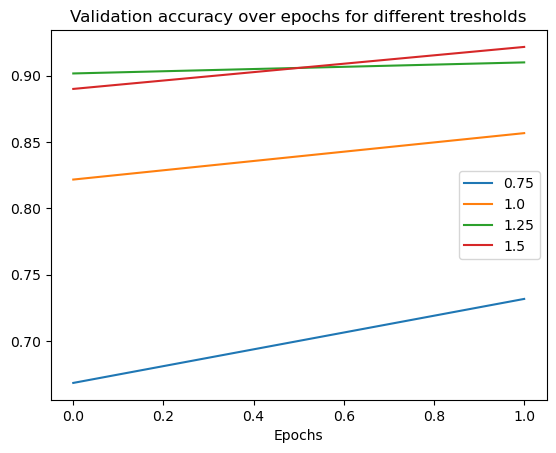

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


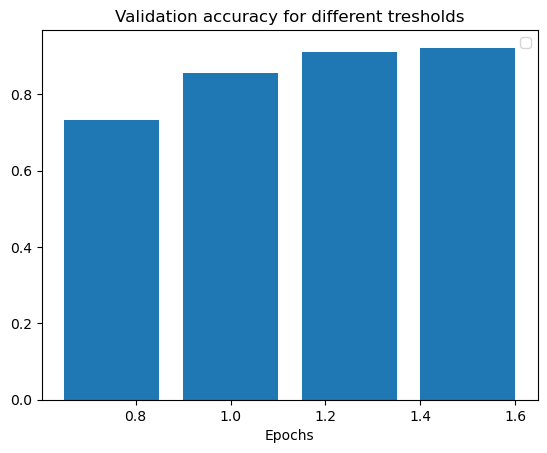

F1 score 0.8347826086956522 for 1


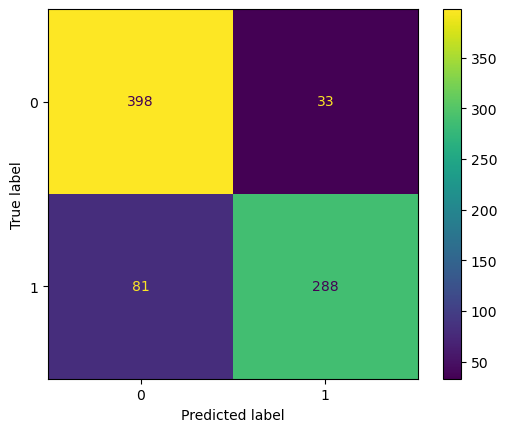

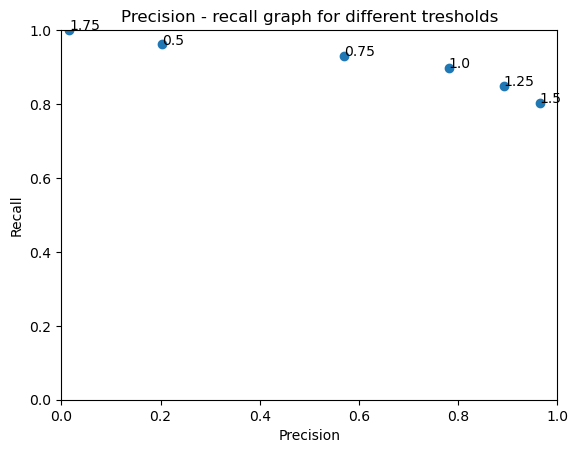

Precision:
[[0.20325203]
 [0.56910569]
 [0.7804878 ]
 [0.89159892]
 [0.96476965]
 [0.01626016]]
Recall:
[[0.96153846]
 [0.92920354]
 [0.89719626]
 [0.8501292 ]
 [0.80361174]
 [1.        ]]
Model Saved Successfully


100%|██████████| 1/1 [00:05<00:00,  5.92s/it]

Test loss 0.20518997311592102
Test accuracy 0.89 for 1

Test accuracy 0.9 for 1.5

Test accuracy 0.86 for 1.75

Test accuracy 0.78 for 2

F1 score 0.9375000000000001 for 1


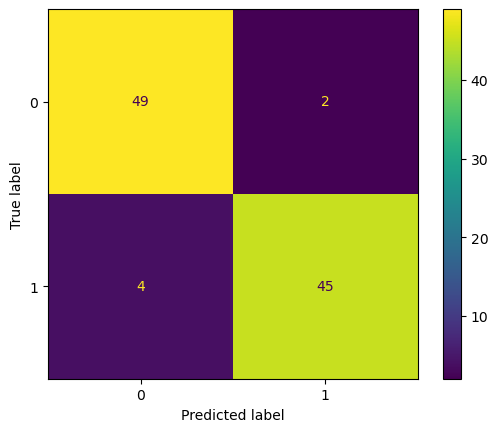

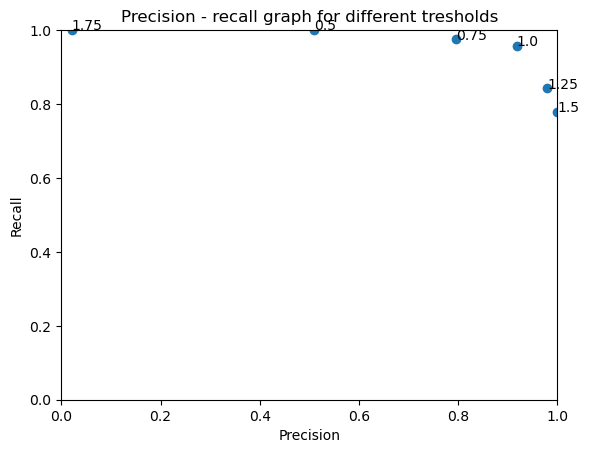

Precision:
[[0.51020408]
 [0.79591837]
 [0.91836735]
 [0.97959184]
 [1.        ]
 [0.02040816]]
Recall:
[[1.        ]
 [0.975     ]
 [0.95744681]
 [0.84210526]
 [0.77777778]
 [1.        ]]


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = trainSiamens(epochs=epochs, optimizer=optimizer, sch=sch, tresholds=tresholds, \
                     criterion=criterion, net = net, device=device, train_dataloader=train_dataloader, val_dataloader=val_dataloader)
torch.save(model.state_dict(), "model.pt")
print("Model Saved Successfully") 

test(model, tresholds=[1,1.5,1.75,2], test_dataloader=test_dataloader, device=device, criterion=criterion, best_tr=1.5)


In [9]:
def imshow1(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [11]:
test_dataloader = generate_test(batch_size=1, use_cuda=use_cuda, num_class=2,NxN=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


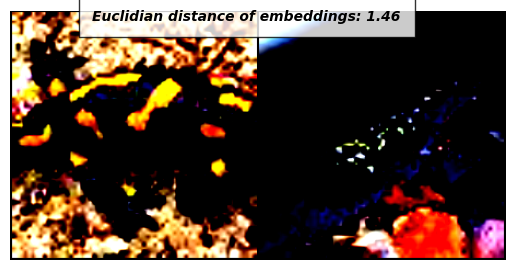

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


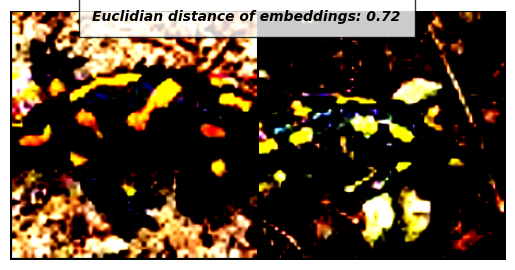

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


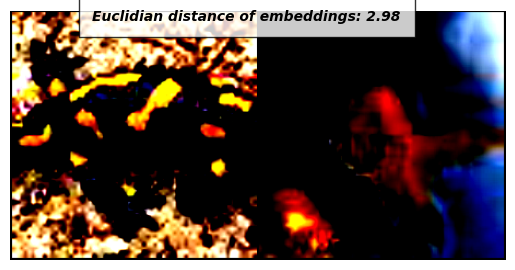

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


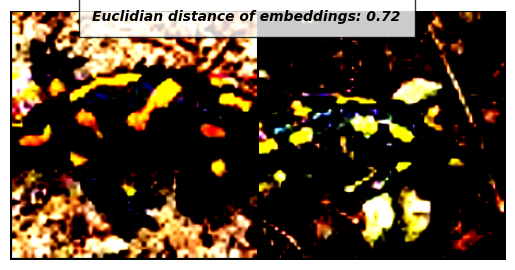

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


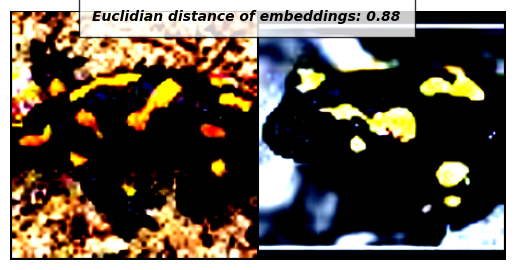

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


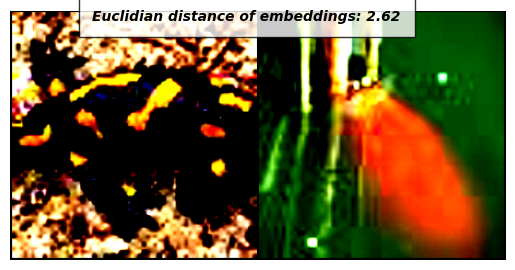

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


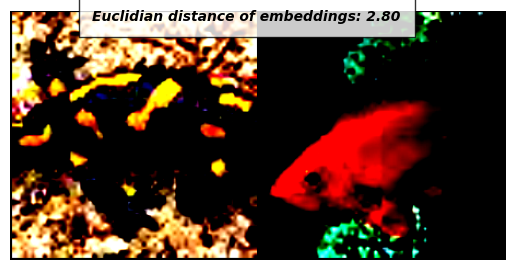

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


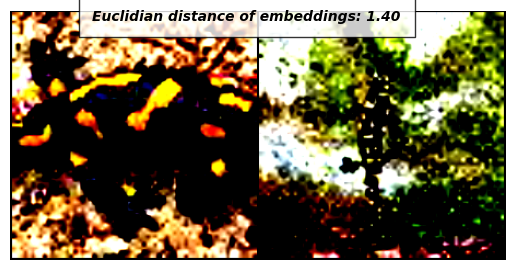

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


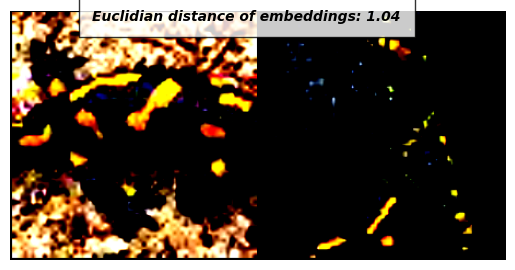

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


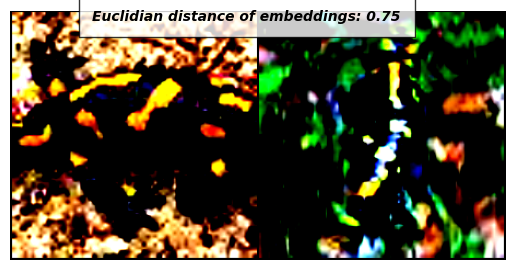

In [13]:
dataiter = iter(test_dataloader)
x0,_,_ = next(dataiter)

for i in range(10):
    _,x1,label2 = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = F.pairwise_distance(output1.to(device), output2.to(device))
    imshow1(torchvision.utils.make_grid(concatenated),'Euclidian distance of embeddings: {:.2f}'.format(euclidean_distance[0].item()))

In [ ]:
lista = [[]]*5
lista[0].append(2)
lista[3].append(4)
print(lista)